In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [150]:
def read_netflix_data(file_path):
    return pd.read_csv(file_path)

In [151]:
def display_first_few_rows(df):
    print("First few rows of the DataFrame:")
    print(df.head())

In [152]:
def display_column_names(df):
    print("\nColumn names:")
    print(df.columns)

In [153]:
def display_data_shape(df):
    print("\nShape of the DataFrame:")
    print(df.shape)

def display_data_types(df):
    print("\nData types of each column:")
    print(df.dtypes)

def display_data_summary(df):
    print("\nSummary of the DataFrame:")
    print(df.info())

In [154]:
def visualize_missing_values(df):
    missing_values = df.isnull().sum().sort_values(ascending=False)
    missing_values = missing_values[missing_values != 0]
    missing_values.plot(kind='barh', colormap='viridis', grid=True, edgecolor='black', linewidth=2,
                        xlabel='Number of missing values', ylabel='Column names',
                        title='The number of missing values for each column')
    plt.show()

In [155]:
def visualize_proportion_of_content(df):
    movies_count = df.loc[df['type'].isin(['movie', 'short', 'tvMovie', 'video', 'videoGame', 'tvShort'])].shape[0]
    tv_shows_count = df.loc[df['type'].isin(['tvSeries', 'tvEpisode', 'tvSpecial', 'tvMiniSeries'])].shape[0]
    labels = ['Movies', 'TV Shows']
    sizes = [movies_count, tv_shows_count]
    colors = ['#ff9999', '#abcdef']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
    plt.title('Proportion of Movies and TV Shows')
    plt.axis('equal')
    plt.legend(loc='upper right')
    plt.show()
    
    plt.barh(labels, sizes, color=['#ff9999', '#abcdef'])
    plt.xlabel('Count')
    plt.title('Proportion of Movies and TV Shows')
    plt.show()

In [156]:
def visualize_common_genres(df):
    df.genres.value_counts().head(20)
    df.genres.replace(r"\N",np.nan,inplace=True)
    df.genres[df.genres == r'\N'].count()
    
    # Trying to display the values of the type column in a beautiful way
    df['genres'] = df['genres'].str.replace(',', ' & ')
    
    # Filtering data for movies and TV shows separately
    df_genres_movie = df[df['type'].isin(['movie', 'short', 'tvMovie', 'video', 'videoGame'])]
    df_genres_tvshows = df[df['type'].isin(['tvSeries', 'tvEpisode', 'tvSpecial', 'tvMiniSeries', 'tvShort'])]
    
    # Grouping the genres and counting the number of movies and TV shows for each genre
    movies_genre = df_genres_movie.groupby('genres')['imdb_id'].count()
    tvshows_genre = df_genres_tvshows.groupby('genres')['imdb_id'].count()
        
    # Data
    movies_genre = movies_genre.sort_values(ascending=False)[:20]  # Sorting movies genre data in descending order and selecting top 20
    tvshows_genre = tvshows_genre.sort_values(ascending=False)[:20]  # Sorting TV shows genre data in descending order and selecting top 20
    # Get genres present in both movies and TV shows
    common_genres = movies_genre.index.intersection(tvshows_genre.index)
    
    # Filter the genres for movies and TV shows
    movies_genre_common = movies_genre.loc[common_genres]
    tvshows_genre_common = tvshows_genre.loc[common_genres]
    # Create positions for the tick labels
    x = np.arange(len(common_genres))  # Generate an array of x-values using np.arange
    # Plotting the bar chart
    width = 0.35  # Width of each bar

    fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axes

    # Plotting movies genre
    ax.barh(x, movies_genre_common, height=width, label='Movies', color='skyblue')
    # Plotting TV shows genre on top of movies genre
    ax.barh(x + width, tvshows_genre_common, height=width, label='TV Shows', color='lightcoral')

    # Adding labels and title
    ax.set_xlabel('Count', fontsize=12)
    ax.set_ylabel('Genres', fontsize=12)
    ax.set_title('Top Genres for Movies and TV Shows (Common Genres)', fontsize=14)

    # Customizing tick labels
    ax.set_yticks(x + width/2)  # Adjust the position of y-ticks
    ax.set_yticklabels(common_genres, fontsize=10)

    # Adding grid lines
    ax.grid(axis='x', linestyle='--', linewidth=0.5)
    # Adding legend
    ax.legend(fontsize=10)
    # Adjusting layout
    plt.tight_layout()

    # Display the chart
    plt.show()
    return common_genres

In [157]:
def visualize_rating_with_numVotes(df, common_genres):
    # Filter out rows where the 'rating' column is 'No rate'
    df.rating = df.rating[df.rating != 'No rate']

    # Filter out rows where the 'numVotes' column is 'No rate'
    df.numVotes = df.numVotes[df.numVotes != 'No rate']

    # Filter out rows where the 'startYear' column is 'Unknown'
    df.startYear = df.startYear[df.startYear != 'Unknown']

    # Group the filtered data by 'startYear' and calculate the mean of 'rating' and the sum of 'numVotes'
    rate_per_year = df.groupby('startYear').agg({'rating':'mean','numVotes':'sum'})

    # Select just the last 15 years until 2021
    rate_per_year = rate_per_year.iloc[:-1].tail(15)

    # Create the figure object and plot the data
    fig, ax1 = plt.subplots(figsize=(11, 6))

    # Plot the 'rating' column as a line chart with label 'Rating'
    ax1.plot(rate_per_year['rating'], label='Rating', color='#852852', marker='o', linestyle='-', linewidth=2)

    # Set the y-axis label for the line chart
    ax1.set_ylabel('Rating')

    # Create a second y-axis for the bar chart
    ax2 = ax1.twinx()

    # Plot the 'numVotes' column as a bar chart with label 'Number of Votes'
    ax2.bar(rate_per_year.index, rate_per_year['numVotes'], label='Number of Votes', color='skyblue', alpha=0.7)
    # Set the y-axis label for the bar chart
    ax2.set_ylabel('Number of Votes')

    # Set x-axis tick labels to every other index from rate_per_year
    ax1.set_xticks(rate_per_year.index)
    ax1.set_xticklabels(rate_per_year.index.astype(int), rotation=45)

    # Add a legend to the plot
    lines, labels = ax1.get_legend_handles_labels()
    bars, bar_labels = ax2.get_legend_handles_labels()
    ax1.legend(lines + bars, labels + bar_labels, loc='upper right')

    # Add a title
    plt.title("The Average Rating with the Number of Votes in the Last 15 Years")

    # Add grid lines
    plt.grid(True)

    # Show the plot
    plt.show()
    # Display the top genres for movies and TV shows
    print("\nTop Genres for Movies and TV Shows (Common Genres):")
    print(common_genres)

In [158]:
def visualize_most_popular_genres(df):
    # Filter out rows with non-null values in the 'genres' column
    df_filtered = df.dropna(subset=['genres'])

    # Calculate the count of movies and TV shows for each genre
    genre_counts = df_filtered['genres'].str.split(' & ').explode().value_counts()

    # Display the list of most popular genres
    print("Most Popular Genres:")
    print(genre_counts.head())

In [159]:
def visualize_best_worst_rated_genres(df):
    # Filter out rows with non-null values in the 'genres' column
    df_filtered = df.dropna(subset=['genres'])

    # Calculate the count of movies and TV shows for each genre
    genre_counts = df_filtered['genres'].str.split(' & ').explode().value_counts()

    # Calculate the average rating for each genre
    genre_ratings = df_filtered.groupby('genres')['rating'].mean()

    # Sort the genres based on ratings in descending order
    best_rated_genres = genre_ratings.sort_values(ascending=False)

    # Display the list of most liked genres based on average ratings
    print("\nMost Liked Genres (based on high rating):")
    print(best_rated_genres.head())
    print("\nGenres with the Worst Ratings:")
    print(best_rated_genres.tail())

In [160]:
def visualize_best_movies_by_genre(df):
    # Further filter out rows with missing values in the 'rating' column
    df_filtered = df.dropna(subset=['rating']).copy()

    # Ensure that the rating column is numeric
    df_filtered['rating'] = pd.to_numeric(df_filtered['rating'], errors='coerce')

    # Suggesting the best-suited movie for a user in every genre
    best_movies_by_genre = df_filtered.loc[df_filtered.groupby('genres')['rating'].idxmax()][['genres', 'title', 'rating']]
    
    # Display the best movies by genre
    print("\nBest Movies by Genre:")
    print(best_movies_by_genre)

In [161]:
def visualize_worst_rated_genres_without_Nan(df):
    # Drop rows with missing values in the 'genres' or 'rating' columns
    df_filtered = df.dropna(subset=['genres', 'rating'])

    # Calculate the average rating for each genre
    genre_ratings = df_filtered.groupby('genres')['rating'].mean()

    # Sort the genres based on ratings in ascending order
    worst_rated_genres = genre_ratings.sort_values()

    # Display the list of genres with the worst ratings
    print("\nGenres with the Worst Ratings with out NaN:")
    print(worst_rated_genres.head())


In [162]:
def best_worst_rated_movies(df):
    # Movies with the best ratings
    best_rated_movies = df.sort_values(by='rating', ascending=False).head(10)

    # Movies with the worst ratings
    worst_rated_movies = df.sort_values(by='rating').head(10)

    # Display the best rated movies
    print("\nMovies with the Best Ratings:")
    print(best_rated_movies[['title', 'rating']])

    # Display the worst rated movies
    print("\nMovies with the Worst Ratings:")
    print(worst_rated_movies[['title', 'rating']])


In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def recommend_content(title, df, top_n=10):
    # Fill NaN values with an empty string
    df['genres'] = df['genres'].fillna('')
    
    # Initialize the TfidfVectorizer
    tfidf = TfidfVectorizer(stop_words='english')
    
    # Compute the TF-IDF matrix
    tfidf_matrix = tfidf.fit_transform(df['genres'])
    
    # Compute the cosine similarity matrix
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index of the movie that matches the title
    idx = df.index[df['title'] == title].tolist()
    
    if len(idx) == 0:
        print(f"Title '{title}' not found in the dataset.")
        return
    
    idx = idx[0]
    
    # Get the pairwise similarity scores of all movies with the input movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the top_n most similar movies
    sim_scores = sim_scores[1:top_n+1]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top_n most similar movies
    print(f"\nTop {top_n} recommendations for '{title}':")
    print(df[['title', 'genres', 'rating']].iloc[movie_indices])

In [164]:
def evaluate_recommendation(df, user_input):
    # Filtering the DataFrame based on user input
    recommended_titles = df[df['title'].str.contains(user_input, case=False)]

    # Displaying recommended titles
    if recommended_titles.empty:
        print("No titles found matching your input.")
    else:
        print("Recommended Titles:")
        print(recommended_titles[['title', 'rating']])

    return recommended_titles


In [165]:
file_path = "E:/netflix_list.csv"
netflix_data = read_netflix_data(file_path)
display_first_few_rows(netflix_data)
display_column_names(netflix_data)

First few rows of the DataFrame:
     imdb_id                title popular_rank certificate  startYear  \
0  tt4052886              Lucifer            1          15     2016.0   
1  tt0993840     Army of the Dead            2          18     2021.0   
2  tt7255502  The Kominsky Method            3          18     2018.0   
3  tt0108778              Friends            4         13+     1994.0   
4  tt9251798             Ragnarok            5          18     2020.0   

   endYear  episodes runtime      type  orign_country   language  \
0      NaN      93.0      42  tvSeries  United States    English   
1      NaN       NaN     148     movie  United States    English   
2   2021.0      22.0      30  tvSeries  United States    English   
3   2004.0     235.0      22  tvSeries  United States    English   
4      NaN      12.0      45  tvSeries         Norway  Norwegian   

                                                plot  \
0  Lucifer Morningstar has decided he's had enoug...   
1  Foll

In [166]:
display_data_shape(netflix_data)
display_data_types(netflix_data)
display_data_summary(netflix_data)


Shape of the DataFrame:
(7008, 19)

Data types of each column:
imdb_id           object
title             object
popular_rank      object
certificate       object
startYear        float64
endYear          float64
episodes         float64
runtime           object
type              object
orign_country     object
language          object
plot              object
summary           object
rating           float64
numVotes         float64
genres            object
isAdult            int64
cast              object
image_url         object
dtype: object

Summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        7008 non-null   object 
 1   title          7008 non-null   object 
 2   popular_rank   7008 non-null   object 
 3   certificate    2409 non-null   object 
 4   startYear      6493 non-null   float64
 5   

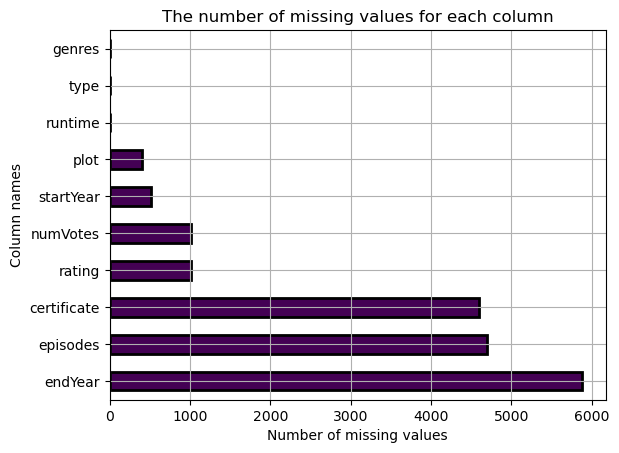

In [167]:
visualize_missing_values(netflix_data)

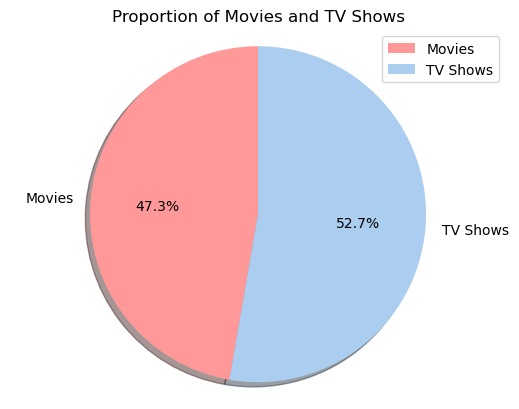

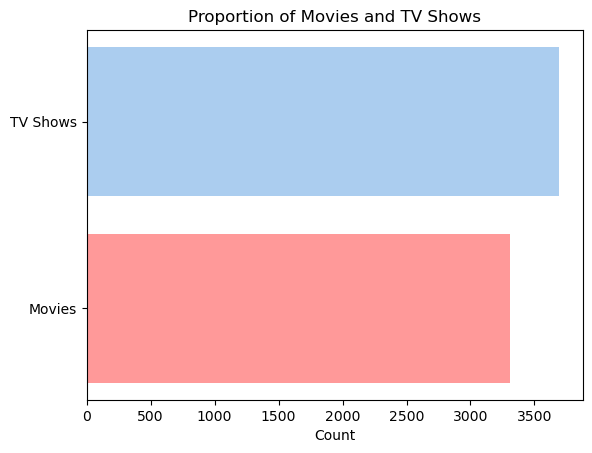

In [168]:
visualize_proportion_of_content(netflix_data)

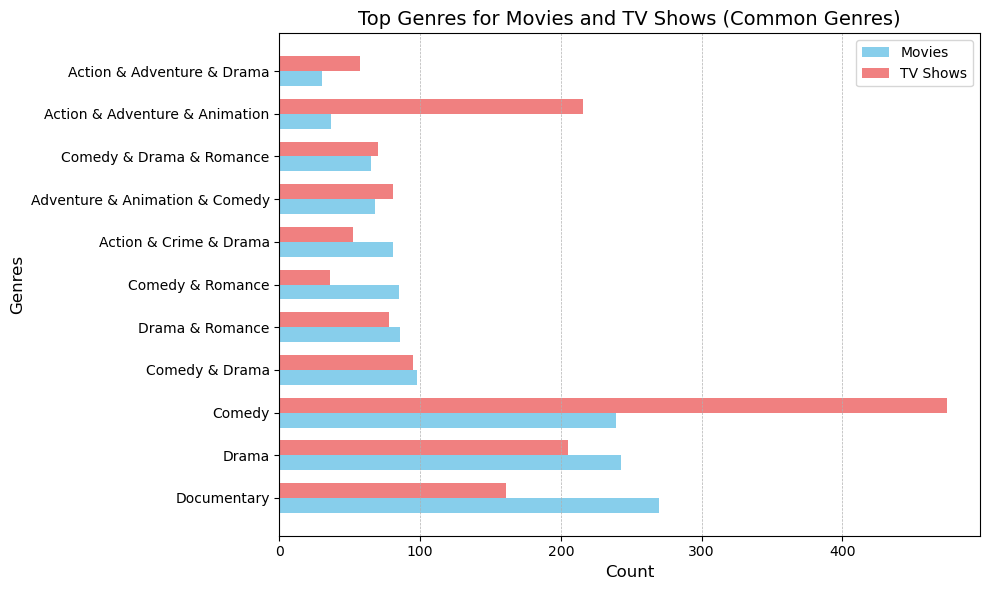

In [169]:
common_genres = visualize_common_genres(netflix_data)

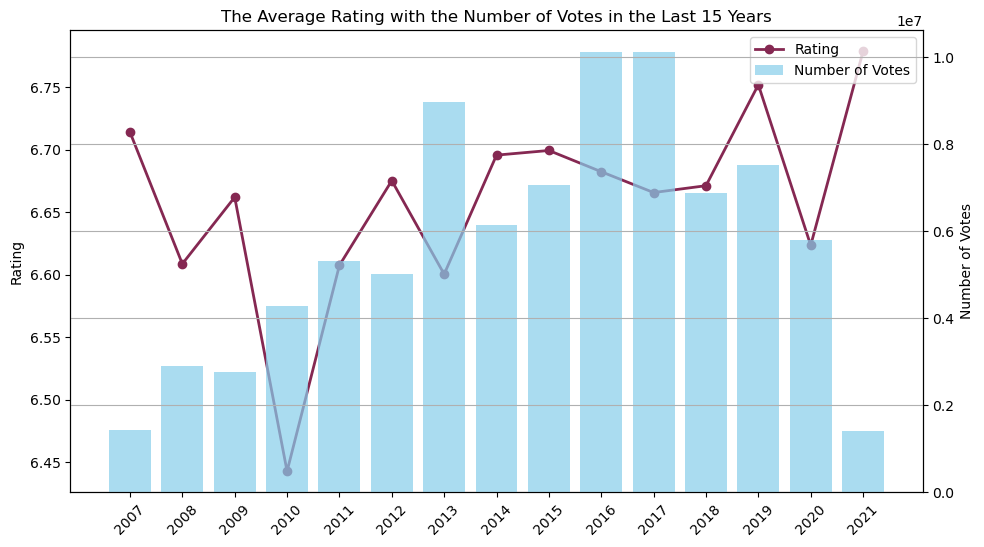


Top Genres for Movies and TV Shows (Common Genres):
Index(['Documentary', 'Drama', 'Comedy', 'Comedy & Drama', 'Drama & Romance',
       'Comedy & Romance', 'Action & Crime & Drama',
       'Adventure & Animation & Comedy', 'Comedy & Drama & Romance',
       'Action & Adventure & Animation', 'Action & Adventure & Drama'],
      dtype='object', name='genres')


In [170]:
visualize_rating_with_numVotes(netflix_data,common_genres)

In [171]:
visualize_most_popular_genres(netflix_data)

Most Popular Genres:
Drama          2848
Comedy         2176
Action         1233
Documentary    1020
Crime           998
Name: genres, dtype: int64


In [172]:
visualize_best_worst_rated_genres(netflix_data)


Most Liked Genres (based on high rating):
genres
Crime & Mystery & Romance       8.8
Short                           8.7
Comedy & Crime & Romance        8.6
Family & Talk-Show              8.6
Documentary & Sci-Fi & Short    8.6
Name: rating, dtype: float64

Genres with the Worst Ratings:
genres
News & Reality-TV    NaN
Reality-TV & Short   NaN
Romance & Thriller   NaN
Sci-Fi & Short       NaN
Sport & Talk-Show    NaN
Name: rating, dtype: float64


In [173]:
visualize_best_movies_by_genre(netflix_data)


Best Movies by Genre:
                              genres                        title  rating
3801                          Action                   Pa-su-kkun     7.8
2135              Action & Adventure   Mayor Grom: Chumnoy Doktor     6.5
137   Action & Adventure & Animation   Avatar: The Last Airbender     9.3
119   Action & Adventure & Biography    Spartacus: Blood and Sand     8.5
6226     Action & Adventure & Comedy         The Umbrella Academy     8.4
...                              ...                          ...     ...
3409                           Sport           Wang Qiu Shao Nian     7.6
3644                       Talk-Show   Stranger Things: Spotlight     9.4
669                         Thriller                      Nayattu     8.2
3712                             War  21 Sarfarosh Saragarhi 1897     8.2
2864                         Western           Man Without a Star     6.9

[474 rows x 3 columns]


In [174]:
visualize_worst_rated_genres_without_Nan(netflix_data)


Genres with the Worst Ratings with out NaN:
genres
Drama & Family & Reality-TV    2.80
Action & Horror & Thriller     3.42
Action & Horror                3.90
Fantasy & Music                3.90
Action & Horror & Mystery      3.95
Name: rating, dtype: float64


In [175]:
best_worst_rated_movies(netflix_data)


Movies with the Best Ratings:
                            title  rating
6793            Ask the StoryBots     9.7
3644   Stranger Things: Spotlight     9.4
14                   Breaking Bad     9.4
1146                   Our Planet     9.3
137    Avatar: The Last Airbender     9.3
761   Cosmos: A Spacetime Odyssey     9.3
6669                        Fargo     9.3
590                 Word of Honor     9.3
59                 Rick and Morty     9.2
6929                    Heartland     9.2

Movies with the Worst Ratings:
                        title  rating
5647              Defcon 2012     1.7
4200       Way of the Vampire     1.9
4357                  Hajwala     2.1
4750        River of Darkness     2.1
3585           Sinister Squad     2.1
2300                   Romina     2.2
5189           Sins Expiation     2.2
4116  Machhli Jal Ki Rani Hai     2.3
5281          The Doll Master     2.3
3170          Dahmer vs. Gacy     2.4


In [176]:
# Example usage of the recommendation engine
inp = input()
recommend_content(inp, netflix_data, top_n=5)

Lucifer

Top 5 recommendations for 'Lucifer':
                 title                   genres  rating
125  Girl From Nowhere  Crime & Drama & Fantasy     7.7
234     The Irregulars  Crime & Drama & Fantasy     5.9
253              Grimm  Crime & Drama & Fantasy     7.8
620          Tidelands  Crime & Drama & Fantasy     7.0
808   Cidade Invisível  Crime & Drama & Fantasy     7.4


In [177]:
# Assuming the user input is provided as a string
user_input = input("Enter a movie or TV show: ")

# Call the evaluate_recommendation function
recommended_titles = evaluate_recommendation(netflix_data, user_input)


Enter a movie or TV show: Lucifer
Recommended Titles:
         title  rating
0      Lucifer     8.1
6293   Lucifer     8.2
